In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/data/student_performance_dataset.csv')

df = pd.read_csv('student_performance_dataset.csv')

Mounted at /content/drive


In [ ]:
#data preprocessing
df.head()

,StudentID,Name,Gender,Class,Section,ExamTerm,Math,Science,English,History,Computer,Total,Average,Grade
0,S0226,Ashley Rodriguez,Male,10A,A,Term 1,51.0,63.0,28.0,35.0,17.0,194,38.80,E
1,S0216,Aaron Patterson,Male,10A,A,Term 1,78.0,79.0,16.0,37.0,5.0,215,43.00,Invalid
2,S0348,Anthony Morrison,Female,10A,B,Term 1,77.0,34.0,96.0,80.0,85.0,373,73.08,B
3,S0128,Gabriel Kennedy,Male,10C,B,Term 2,50.0,50.0,27.0,66.0,33.0,226,45.20,NaN
4,S0385,Matthew Wood,Female,10B,B,Term 2,75.0,49.0,7.0,18.0,42.0,191,38.20,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  510 non-null    object 
 1   Name       510 non-null    object 
 2   Gender     510 non-null    object 
 3   Class      510 non-null    object 
 4   Section    510 non-null    object 
 5   ExamTerm   510 non-null    object 
 6   Math       477 non-null    float64
 7   Science    488 non-null    float64
 8   English    479 non-null    float64
 9   History    485 non-null    float64
 10  Computer   480 non-null    float64
 11  Total      510 non-null    int64  
 12  Average    510 non-null    float64
 13  Grade      452 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 55.9+ KB


In [ ]:
df.describe()

,Math,Science,English,History,Computer,Total,Average
count,477.000000,488.000000,479.000000,485.000000,480.000000,510.000000,510.000000
mean,50.746331,50.120902,50.638831,52.515464,50.197917,229.266667,49.995176
std,30.806877,30.807139,33.089915,31.496397,32.450000,70.239105,13.847934
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,41.000000,8.200000
25%,25.000000,24.000000,22.000000,27.000000,22.750000,179.250000,40.400000
50%,50.000000,50.000000,51.000000,53.000000,51.000000,223.000000,48.200000
75%,76.000000,74.000000,80.500000,79.000000,75.000000,281.000000,60.097500
max,150.000000,150.000000,150.000000,150.000000,150.000000,441.000000,89.750000


In [ ]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'Class', 'Section', 'ExamTerm', 'Math',
       'Science', 'English', 'History', 'Computer', 'Total', 'Average',
       'Grade'],
      dtype='object')

In [ ]:
#handle repeated values
df = df.drop_duplicates(subset='StudentID')


In [ ]:
# handle null values
df.fillna({
     'Math': df['Math'].mean(),
     'Science': df['Science'].mean(),
     'English': df['English'].mean(),
     'History': df['History'].mean(),
     'Computer': df['Computer'].mean()
}, inplace = True)

/tmp/ipython-input-2869863691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({


In [ ]:
#marks should lie between 0-100
sub = ['Math', 'Science', 'English', 'History', 'Computer']
df[sub] = df[sub].clip(0 , 100)

/tmp/ipython-input-3751579403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sub] = df[sub].clip(0 , 100)


In [ ]:
#cal new avg and grades
df['Total'] = df[sub].sum(axis=1)
df['Average']= df['Total']/len(sub)

/tmp/ipython-input-3719655681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df[sub].sum(axis=1)
/tmp/ipython-input-3719655681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average']= df['Total']/len(sub)


In [ ]:
#new grades
def grades(avg):
  if avg >= 90:
    return 'A+'
  elif avg >= 80:
    return 'A'
  elif avg >= 70:
    return 'B+'
  elif avg >= 60:
    return 'B'
  elif avg >= 50:
    return 'C'
  elif avg >= 40:
    return 'D'
  elif avg >= 30:
    return 'E'
  else:
    return 'F'

df['Grade'] = df['Average'].apply(grades)


/tmp/ipython-input-2168931030.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grade'] = df['Average'].apply(grades)


In [ ]:
# This checks if the last letter of 'Class' matches the 'Section' column (row-by-row)
df_invalid = df[~df.apply(lambda row: row['Class'].strip().endswith(row['Section'].strip()), axis=1)]

print(f"Total mismatched rows: {len(df_invalid)}")
#df_invalid.head(509)
df_invalid.count()

Total mismatched rows: 327


,0
StudentID,327
Name,327
Gender,327
Class,327
Section,327
ExamTerm,327
Math,327
Science,327
English,327
History,327


In [ ]:
# Extract last letter from Class (e.g., '10 A' → 'A')
df['CorrectSection'] = df['Class'].str.extract(r'(\b[A-Z])$')

# Replace current Section with the correct one
df['Section'] = df['CorrectSection']

# Drop helper column
df.drop(columns='CorrectSection', inplace=True)


In [ ]:
df_sorted = df.sort_values(by=['ExamTerm'])
df_sorted.reset_index(drop=True, inplace=True)


In [ ]:
print(df.columns.tolist())


['StudentID', 'Name', 'Gender', 'Class', 'Section', 'ExamTerm', 'Math', 'Science', 'English', 'History', 'Computer', 'Total', 'Average', 'Grade']


In [ ]:
# Remove spaces and standardize values
df['ExamTerm'] = df['ExamTerm'].str.strip()
df['Section'] = df['Section'].str.strip().str.upper()
#rearranging iinto terms and sections
df = df.sort_values(by=['ExamTerm'])

# Reset the row index for neatness
df_sorted.reset_index(drop=True, inplace=True)



In [ ]:
#data preprocessing
df.head(510)

,StudentID,Name,Gender,Class,Section,ExamTerm,Math,Science,English,History,Computer,Total,Average,Grade
0,S0226,Ashley Rodriguez,Male,10A,NaN,Term 1,51.000000,63.0,28.0,35.0,17.000000,194.000000,38.800000,E
192,S0466,Joshua Downs,Male,10A,NaN,Term 1,30.000000,100.0,70.0,74.0,72.000000,346.000000,69.200000,B
193,S0305,Rebecca Patterson,Female,10C,NaN,Term 1,50.000000,91.0,63.0,77.0,19.000000,300.000000,60.000000,B
194,S0269,Joshua Bailey,Female,10B,NaN,Term 1,39.000000,67.0,28.0,46.0,50.000000,230.000000,46.000000,D
195,S0188,Judy Campos,Male,10A,NaN,Term 1,98.000000,28.0,91.0,15.0,63.000000,295.000000,59.000000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,S0294,Brent Mclaughlin,Female,10C,NaN,Term 2,75.000000,8.0,34.0,97.0,40.000000,254.000000,50.800000,C
205,S0246,Luis Young,Other,10C,NaN,Term 2,50.000000,44.0,68.0,73.0,70.000000,305.000000,61.000000,B
202,S0420,Mary Warren,Male,10A,NaN,Term 2,90.000000,86.0,20.0,25.0,87.000000,308.000000,61.600000,B
226,S0020,Robin Lewis,Female,10A,NaN,Term 2,32.000000,9.0,51.0,57.0,3.000000,152.000000,30.400000,E


In [ ]:
#Data analysis

#no of students categorization
print(df_sorted['ExamTerm'].value_counts() ,'\n')
print(df_sorted['Section'].value_counts(),'\n')
print(df_sorted['Gender'].value_counts(),'\n')
print(df_sorted['Grade'].value_counts(),'\n')
print('----------------------------------------------------')
print(df_sorted.groupby(['ExamTerm', 'Class', 'Gender']).size().reset_index(name='Count') ,'\n')



ExamTerm
Term 2    258
Term 1    242
Name: count, dtype: int64 

Series([], Name: count, dtype: int64) 

Gender
Male      171
Other     165
Female    164
Name: count, dtype: int64 

Grade
D     135
C     120
B      94
E      91
B+     30
F      25
A       4
A+      1
Name: count, dtype: int64 

----------------------------------------------------
   ExamTerm Class  Gender  Count
0    Term 1   10A  Female     24
1    Term 1   10A    Male     32
2    Term 1   10A   Other     21
3    Term 1   10B  Female     31
4    Term 1   10B    Male     22
5    Term 1   10B   Other     31
6    Term 1   10C  Female     22
7    Term 1   10C    Male     32
8    Term 1   10C   Other     27
9    Term 2   10A  Female     33
10   Term 2   10A    Male     30
11   Term 2   10A   Other     30
12   Term 2   10B  Female     21
13   Term 2   10B    Male     22
14   Term 2   10B   Other     27
15   Term 2   10C  Female     33
16   Term 2   10C    Male     33
17   Term 2   10C   Other     29 



In [ ]:

# 1 find subject wise avg for both term and overall
print('----------------------------------------------------')
sub_avg = df_sorted[['Math', 'Science', 'English', 'History', 'Computer']].mean()
print("Overall Subject Averages:\n", sub_avg)
term1 = df_sorted[df_sorted['ExamTerm'] == 'Term 1']
term2 = df_sorted[df_sorted['ExamTerm'] == 'Term 2']

term1_avg = term1[['Math', 'Science', 'English', 'History', 'Computer']].mean()
print('\nAverage in Term 1 :\n', term1_avg)
term2_avg = term2[['Math', 'Science', 'English', 'History', 'Computer']].mean()
print('\nAverage in Term 1 :\n', term2_avg)

female = df_sorted[df_sorted['Gender']== 'Female']
other = df_sorted[df_sorted['Gender']== 'Other']
male = df_sorted[df_sorted['Gender']== 'Male']

Female_avg = female[['Math', 'Science', 'English', 'History', 'Computer']].mean()
print('\nAverage of female :\n', Female_avg)
Male_avg = male[['Math', 'Science', 'English', 'History', 'Computer']].mean()
print('\nAverage of male :\n', Male_avg)
Other_avg = other[['Math', 'Science', 'English', 'History', 'Computer']].mean()
print('\nAverage of other :\n', Other_avg)



#4 pass percentage
print('----------------------------------------------------')
total_students = len(df_sorted)
fail_student = df_sorted[df_sorted['Grade'] == 'F'].shape[0]
print('no. of students fail :', fail_student)
pass_student = df_sorted[df_sorted['Grade'] != 'F'].shape[0]
print('No. of student pass :',pass_student)
print('pass percentage:',(pass_student/(fail_student+pass_student))*100)



print('----------------------------------------------------')

#6 top performers overall,term wise , section wise, and each maleand female
print('overall topper:')
top_student = df_sorted[df_sorted['Average'] == df_sorted['Average'].max()]
print(top_student[['StudentID', 'Name', 'Average', 'Grade']])



print('term wise topper:')

print('Section wise topper in both terms combined :')


print('subject topper:')

----------------------------------------------------
Overall Subject Averages:
 Math        50.521919
Science     50.053766
English     50.011274
History     52.012632
Computer    49.863185
dtype: float64

Average in Term 1 :
 Math        49.123720
Science     51.324138
English     50.485998
History     49.770822
Computer    48.847318
dtype: float64

Average in Term 1 :
 Math        51.833408
Science     48.862176
English     49.565990
History     54.115414
Computer    50.816052
dtype: float64

Average of female :
 Math        49.988520
Science     50.206258
English     47.650070
History     53.388498
Computer    49.673916
dtype: float64

Average of male :
 Math        50.879138
Science     49.972106
English     52.739263
History     49.336116
Computer    49.122919
dtype: float64

Average of other :
 Math        50.681876
Science     49.986826
English     49.530979
History     53.418947
Computer    50.818491
dtype: float64
----------------------------------------------------
no. of stu

In [ ]:

#6 top performers overall,term wise , section wise, and each maleand female
print('overall topper:')
top_student = df_sorted[df_sorted['Average'] == df_sorted['Average'].max()]
print(top_student[['StudentID', 'Name', 'Average', 'Grade']])
print('----------------------------------------------------')

print('term wise topper:')
term1 = df_sorted[df_sorted['ExamTerm'] == 'Term 1']
term2 = df_sorted[df_sorted['ExamTerm'] == 'Term 2']
term1_topper = term1[term1['Average'] == term1['Average'].max()]
term2_topper = term2[term2['Average'] == term2['Average'].max()]

print(term1_topper[['StudentID', 'Name', 'Average', 'Grade']])
print(term2_topper[['StudentID', 'Name', 'Average', 'Grade']])
print('----------------------------------------------------\n')


print('Section wise topper in both terms combined :')
secA = df_sorted[df_sorted['Class'] == '10A']
secB = df_sorted[df_sorted['Class'] == '10B']
secC = df_sorted[df_sorted['Class'] == '10C']

secA_topper = secA[secA['Average'] == secA['Average'].max()]
secB_topper = secB[secB['Average'] == secB['Average'].max()]
secC_topper = secC[secC['Average'] == secC['Average'].max()]

print(secA_topper[['StudentID', 'Name', 'Average', 'Grade']], '\n')
print(secB_topper[['StudentID', 'Name', 'Average', 'Grade']],'\n')
print(secC_topper[['StudentID', 'Name', 'Average', 'Grade']],'\n')


print('----------------------------------------------------\n')
print('subject topper:\n')
#math
print('Math topper:\n')
# Get the max marks in Math
max_math = df_sorted['Math'].max()
# Get all rows where Math marks == max
maths_top = df_sorted[df_sorted['Math'] == max_math]
# Print the topper(s)
print(maths_top[['StudentID', 'Name', 'Class', 'Math']],'\n\n')

#science
print('science topper:\n')
max_sc = df_sorted['Science'].max()
Science_top = df_sorted[df_sorted['Science'] == max_sc]
print(Science_top[['StudentID', 'Name', 'Class', 'Science']],'\n\n')

#english
print('english topper:\n')
max_English = df_sorted['English'].max()
English_top = df_sorted[df_sorted['English'] == max_English]
print(English_top[['StudentID', 'Name', 'Class', 'English']],'\n\n')

#History
print('history topper:\n')
max_History = df_sorted['History'].max()
History_top = df_sorted[df_sorted['History'] == max_History]
print(History_top[['StudentID', 'Name', 'Class', 'History']],'\n\n')

#Computer
print('computer topper:\n')
max_Computer = df_sorted['Computer'].max()
Computer_top = df_sorted[df_sorted['Computer'] == max_math]
print(Computer_top[['StudentID', 'Name', 'Class', 'Computer']],'\n\n')


overall topper:
    StudentID            Name  Average Grade
320     S0322  Timothy Graves     91.8    A+
----------------------------------------------------
term wise topper:
    StudentID              Name  Average Grade
149     S0290  Shelby Armstrong     81.2     A
236     S0052    Edwin Martinez     81.2     A
    StudentID            Name  Average Grade
320     S0322  Timothy Graves     91.8    A+
----------------------------------------------------

Section wise topper in both terms combined :
    StudentID            Name  Average Grade
320     S0322  Timothy Graves     91.8    A+ 

    StudentID              Name  Average Grade
149     S0290  Shelby Armstrong     81.2     A 

    StudentID            Name  Average Grade
236     S0052  Edwin Martinez     81.2     A 

----------------------------------------------------

subject topper:

Math topper:

    StudentID              Name Class   Math
20      S0224       John Taylor   10C  100.0
120     S0222   Andrew Odonnell   10C 

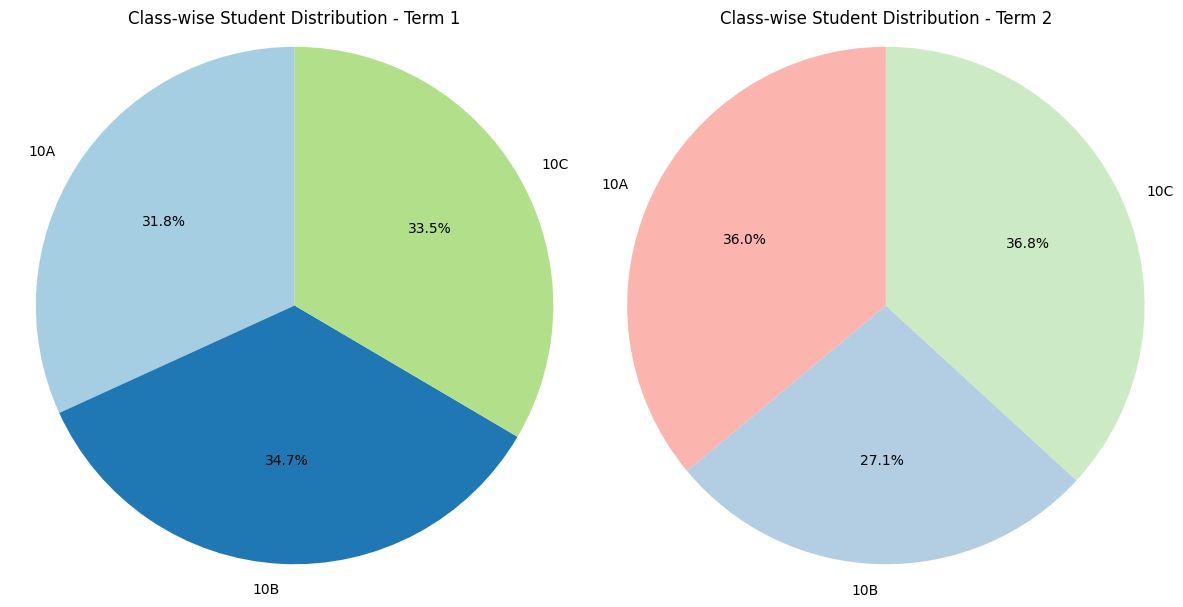

In [ ]:
#Visualizations
#plotting graphs
#1 no. of students in term 1 and term 2 with no. of male and femle
#2 no. of students pass or fail in both term
#3 comparison of students in 3 sections
# Bar plots: Subject-wise average scores.
#Line plots: Term-wise progression for a few students.
#Pie charts: Percentage of students passed/failed.
#Histogram: Distribution of scores in each subject.
#Heatmap: Correlation between subjects.


## pie chart for no. of students in different terms in different
term1_class_counts = term1['Class'].value_counts().sort_index()
term2_class_counts = term2['Class'].value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Term 1
axs[0].pie(term1_class_counts, labels=term1_class_counts.index, autopct='%1.1f%%',
           startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Class-wise Student Distribution - Term 1')
axs[0].axis('equal')

# Pie chart for Term 2
axs[1].pie(term2_class_counts, labels=term2_class_counts.index, autopct='%1.1f%%',
           startangle=90, colors=plt.cm.Pastel1.colors)
axs[1].set_title('Class-wise Student Distribution - Term 2')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

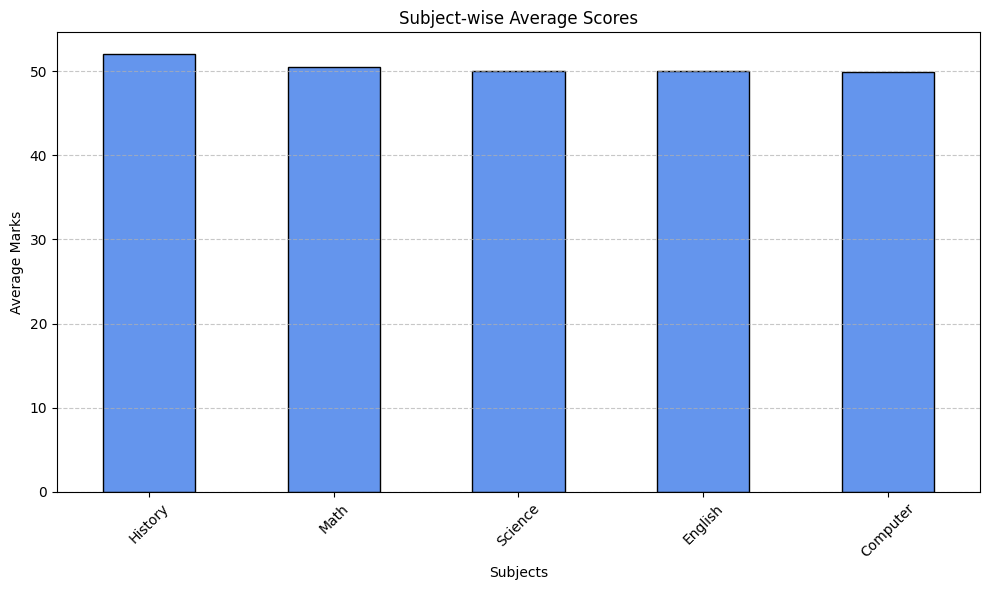

In [ ]:

# List of subject columns — change as per your data
subject_cols = ['Math', 'Science', 'English', 'History', 'Computer']  # update if needed

# Calculate average marks for each subject
subject_averages = df_sorted[subject_cols].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
subject_averages.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Formatting
plt.title('Subject-wise Average Scores')
plt.ylabel('Average Marks')
plt.xlabel('Subjects')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Selected students: ['Jacob Gallagher', 'Marcus Best', 'Jennifer Singh', 'Elizabeth Murray', 'Anne Price', 'Larry Atkins', 'Mario Turner', 'Gabriel Mcguire', 'Kevin Hall', 'Derrick Macdonald']


/tmp/ipython-input-3598506144.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


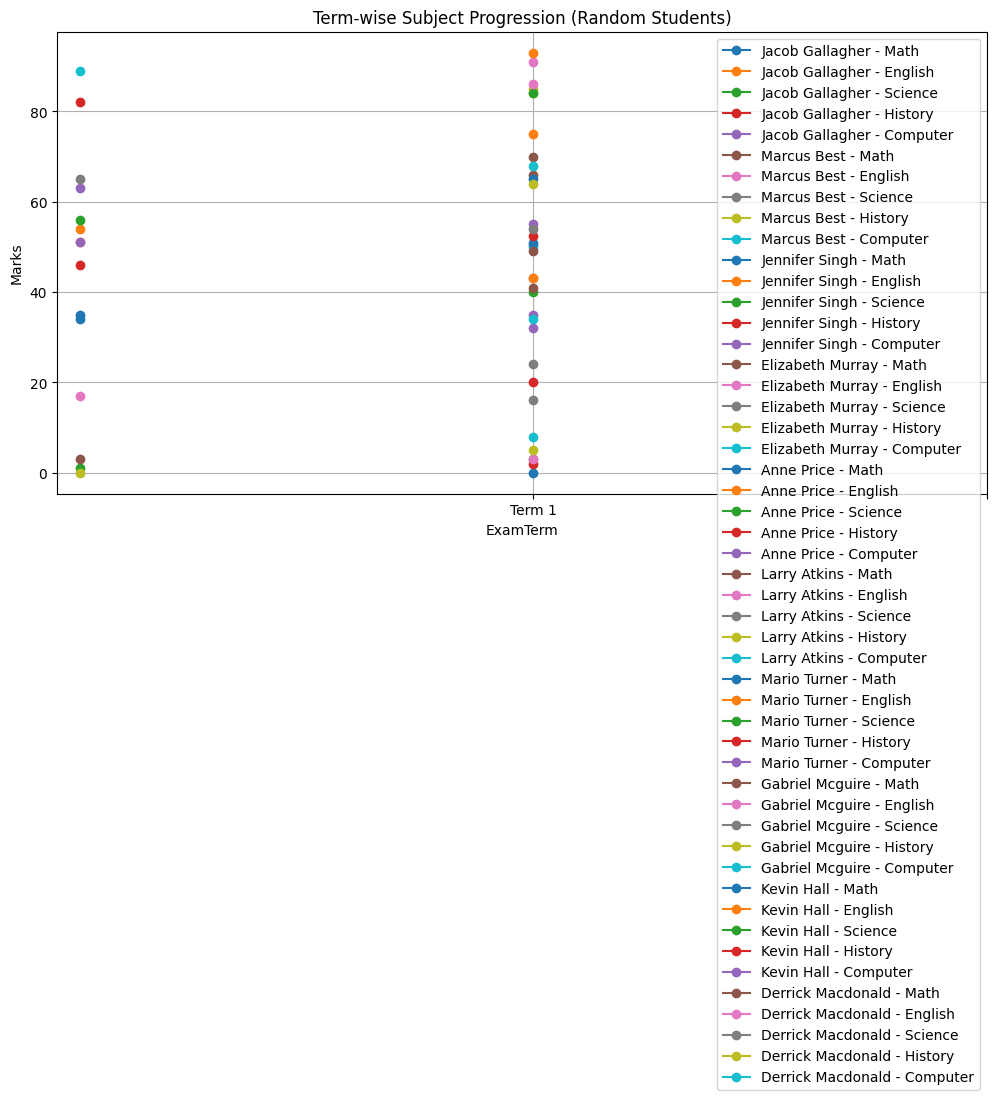

In [ ]:

# Randomly select 3 students
random_students = df_sorted['Name'].drop_duplicates().sample(10, random_state=42).tolist()
print("Selected students:", random_students)

# Subjects to plot
subject_cols = ['Math', 'English', 'Science', 'History', 'Computer']  # Modify based on your dataset

# Filter data for these students
filtered_df = df_sorted[df_sorted['Name'].isin(random_students)]

# Plot
plt.figure(figsize=(12, 6))

for name in random_students:
    student_data = filtered_df[filtered_df['Name'] == name].sort_values('ExamTerm')

    for subject in subject_cols:
        plt.plot(student_data['ExamTerm'], student_data[subject], marker='o', label=f"{name} - {subject}")

plt.title('Term-wise Subject Progression (Random Students)')
plt.xlabel('ExamTerm')
plt.ylabel('Marks')
plt.xticks([1, 2])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

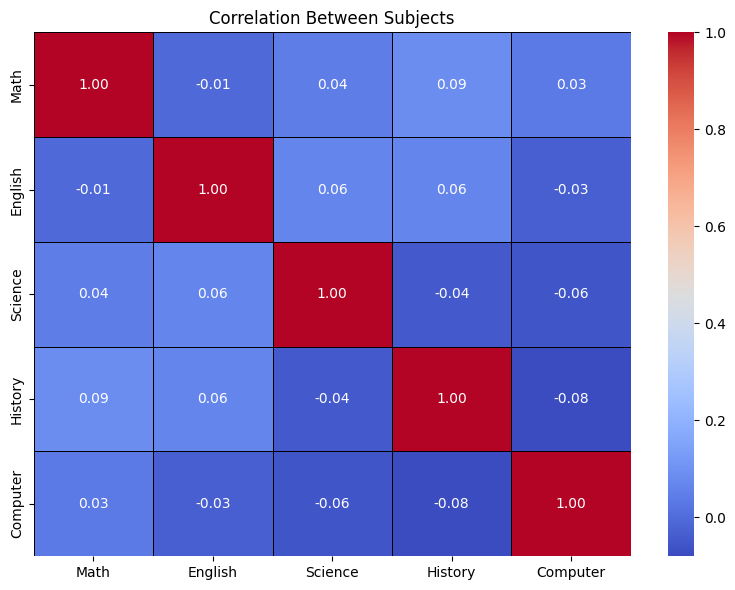

In [ ]:

# List of subject columns — update according to your dataset
subject_cols = ['Math', 'English', 'Science', 'History', 'Computer']  # Adjust as needed

# Extract only subject data
subject_data = df_sorted[subject_cols]

# Compute correlation matrix
correlation_matrix = subject_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title("Correlation Between Subjects")
plt.tight_layout()
plt.show()

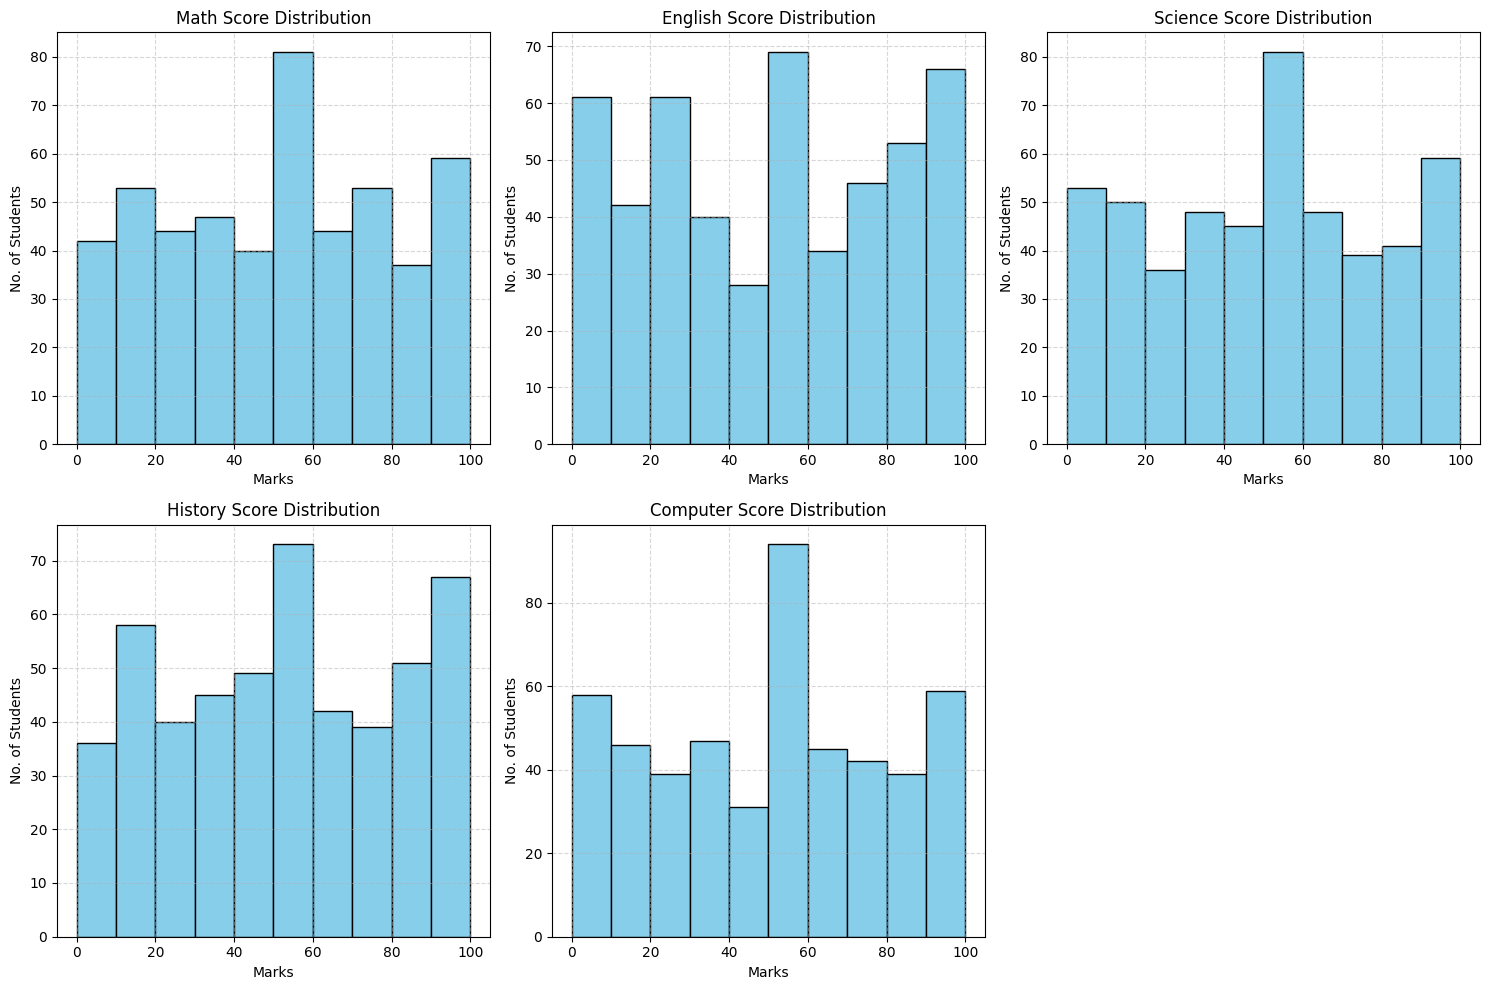

In [ ]:

# List of subject columns — update based on your dataset
subject_cols = ['Math', 'English', 'Science', 'History', 'Computer']  # Adjust as needed

# Set up subplots (change layout based on number of subjects)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# Plot histogram for each subject
for i, subject in enumerate(subject_cols):
    axs[i].hist(df_sorted[subject], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{subject} Score Distribution')
    axs[i].set_xlabel('Marks')
    axs[i].set_ylabel('No. of Students')
    axs[i].grid(True, linestyle='--', alpha=0.5)

# Remove any unused subplot if number of subjects < total subplots
for j in range(len(subject_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

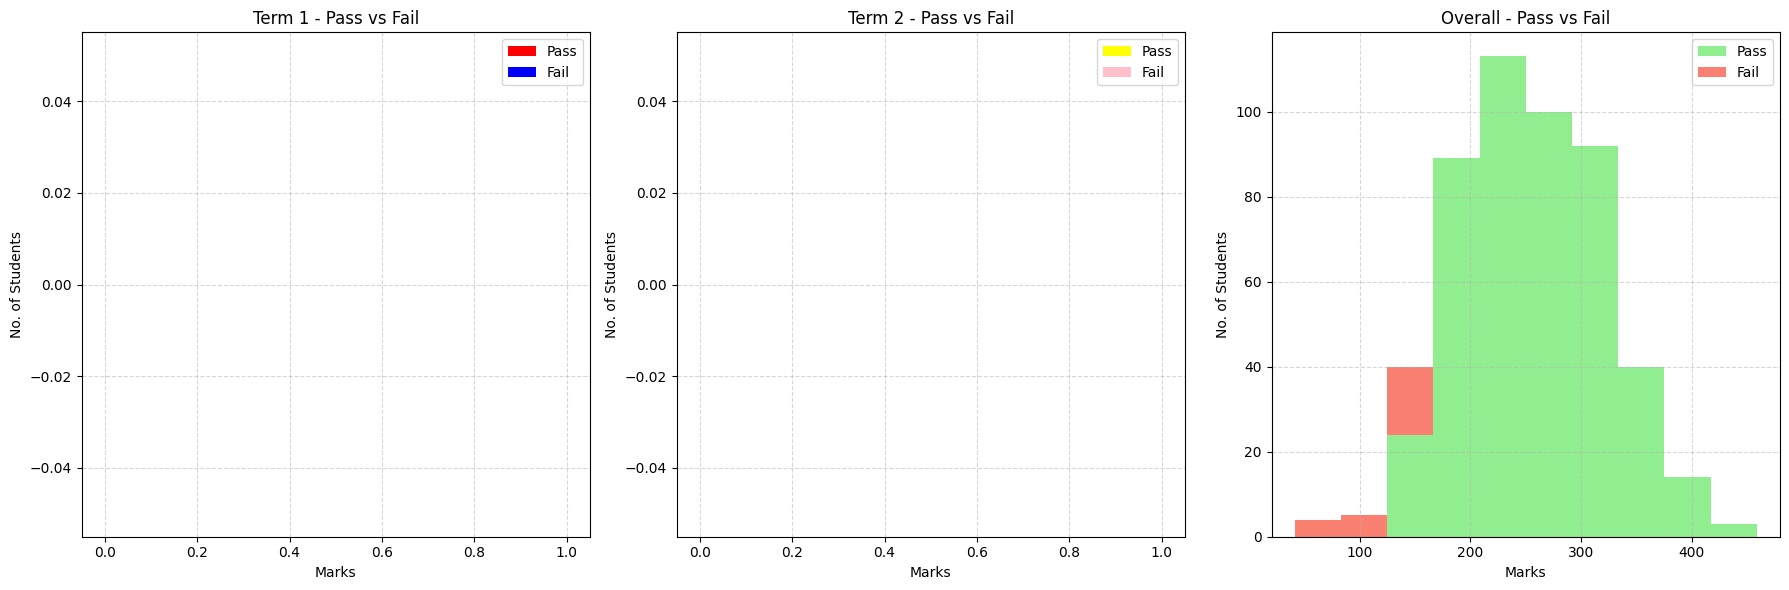

In [ ]:

# Choose a subject column or total marks column
subject_col = 'Total'  # Replace with 'Math', 'English' etc. if needed

# Make sure the column exists
if subject_col not in df_sorted.columns:
    print(f"Column '{subject_col}' not found. Falling back to 'Math'")
    subject_col = 'Math'

# Filter by term
term1 = df_sorted[df_sorted['ExamTerm'] == 1]
term2 = df_sorted[df_sorted['ExamTerm'] == 2]

# Separate pass/fail for each term
term1_pass = term1[(term1['Grade'] != 'F') & (term1[subject_col].notna())][subject_col]
term1_fail = term1[(term1['Grade'] == 'F') & (term1[subject_col].notna())][subject_col]

term2_pass = term2[(term2['Grade'] != 'F') & (term2[subject_col].notna())][subject_col]
term2_fail = term2[(term2['Grade'] == 'F') & (term2[subject_col].notna())][subject_col]

# Overall
overall_pass = df_sorted[(df_sorted['Grade'] != 'F') & (df_sorted[subject_col].notna())][subject_col]
overall_fail = df_sorted[(df_sorted['Grade'] == 'F') & (df_sorted[subject_col].notna())][subject_col]

# Set up figure and axes for 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram: Term 1
axs[0].hist([term1_pass, term1_fail], bins=10, stacked=True, color=['red', 'blue'], label=['Pass', 'Fail'])
axs[0].set_title('Term 1 - Pass vs Fail')
axs[0].set_xlabel('Marks')
axs[0].set_ylabel('No. of Students')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# Histogram: Term 2
axs[1].hist([term2_pass, term2_fail], bins=10, stacked=True, color=['yellow', 'pink'], label=['Pass', 'Fail'])
axs[1].set_title('Term 2 - Pass vs Fail')
axs[1].set_xlabel('Marks')
axs[1].set_ylabel('No. of Students')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Histogram: Overall
axs[2].hist([overall_pass, overall_fail], bins=10, stacked=True, color=['lightgreen', 'salmon'], label=['Pass', 'Fail'])
axs[2].set_title('Overall - Pass vs Fail')
axs[2].set_xlabel('Marks')
axs[2].set_ylabel('No. of Students')
axs[2].legend()
axs[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Install openpyxl if not already installed (needed for Excel writing)
!pip install openpyxl

# Save DataFrame to Excel
df_sorted.to_excel("cleaned_final_student_data.xlsx", index=False)


In [ ]:
from google.colab import files
files.download("cleaned_final_student_data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>